# Random Forest Classification:

- This is the combination of multiple Decision Trees.

Algorithm Functionality:

- This creates multiple decision trees by randomly selecting the features.
- Each Tree makes predictions.
    - In classification, we choose the category on the basis of majority voting.
    - In Regression, we predict the final value by taking the averages generally...



**Hyperparameters:**

- `n_estimators` : default=100, This controls the number of trees inside the classifier [controlling the complexity of the model]

- Rest all like `max_depth` - tree size, `min_samples_split` - granularity (default:2 | simple tree if high), `min_samples_leaf` (default:1 | min size of leaf) are similar to that of decision tree.

- `bootsrap` : Data randomness [`True`/`False`]


Features/Pros:

- Works well even if few data is missing...
- Shows which features are imp.
- Works well big and complex data...
- Robust to overfitting due to mulitple trees...
- No need of Feature Scaling [standardization / normalization]

Disadv.:

- Slower training and prediction speed [heavy memory - lot of trees to be stored...]

In [2]:
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py

In [42]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate data:
X, y = make_classification(n_samples=2000,
                           n_features=5,
                           n_informative=3,
                           random_state=42,
                           shuffle=False)

# Splitting...
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.5)

In [55]:
# Random Foresct Classifier model load and test:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(max_depth=4, min_samples_split=3, n_estimators=150)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_split=3, n_estimators=150)

In [56]:
y_pred = rfc.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score, classification_report


print(f"Accracy: {accuracy_score(y_test, y_pred)}")
print(f"{classification_report(y_test, y_pred)}")

Accracy: 0.962
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       497
           1       0.95      0.98      0.96       503

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



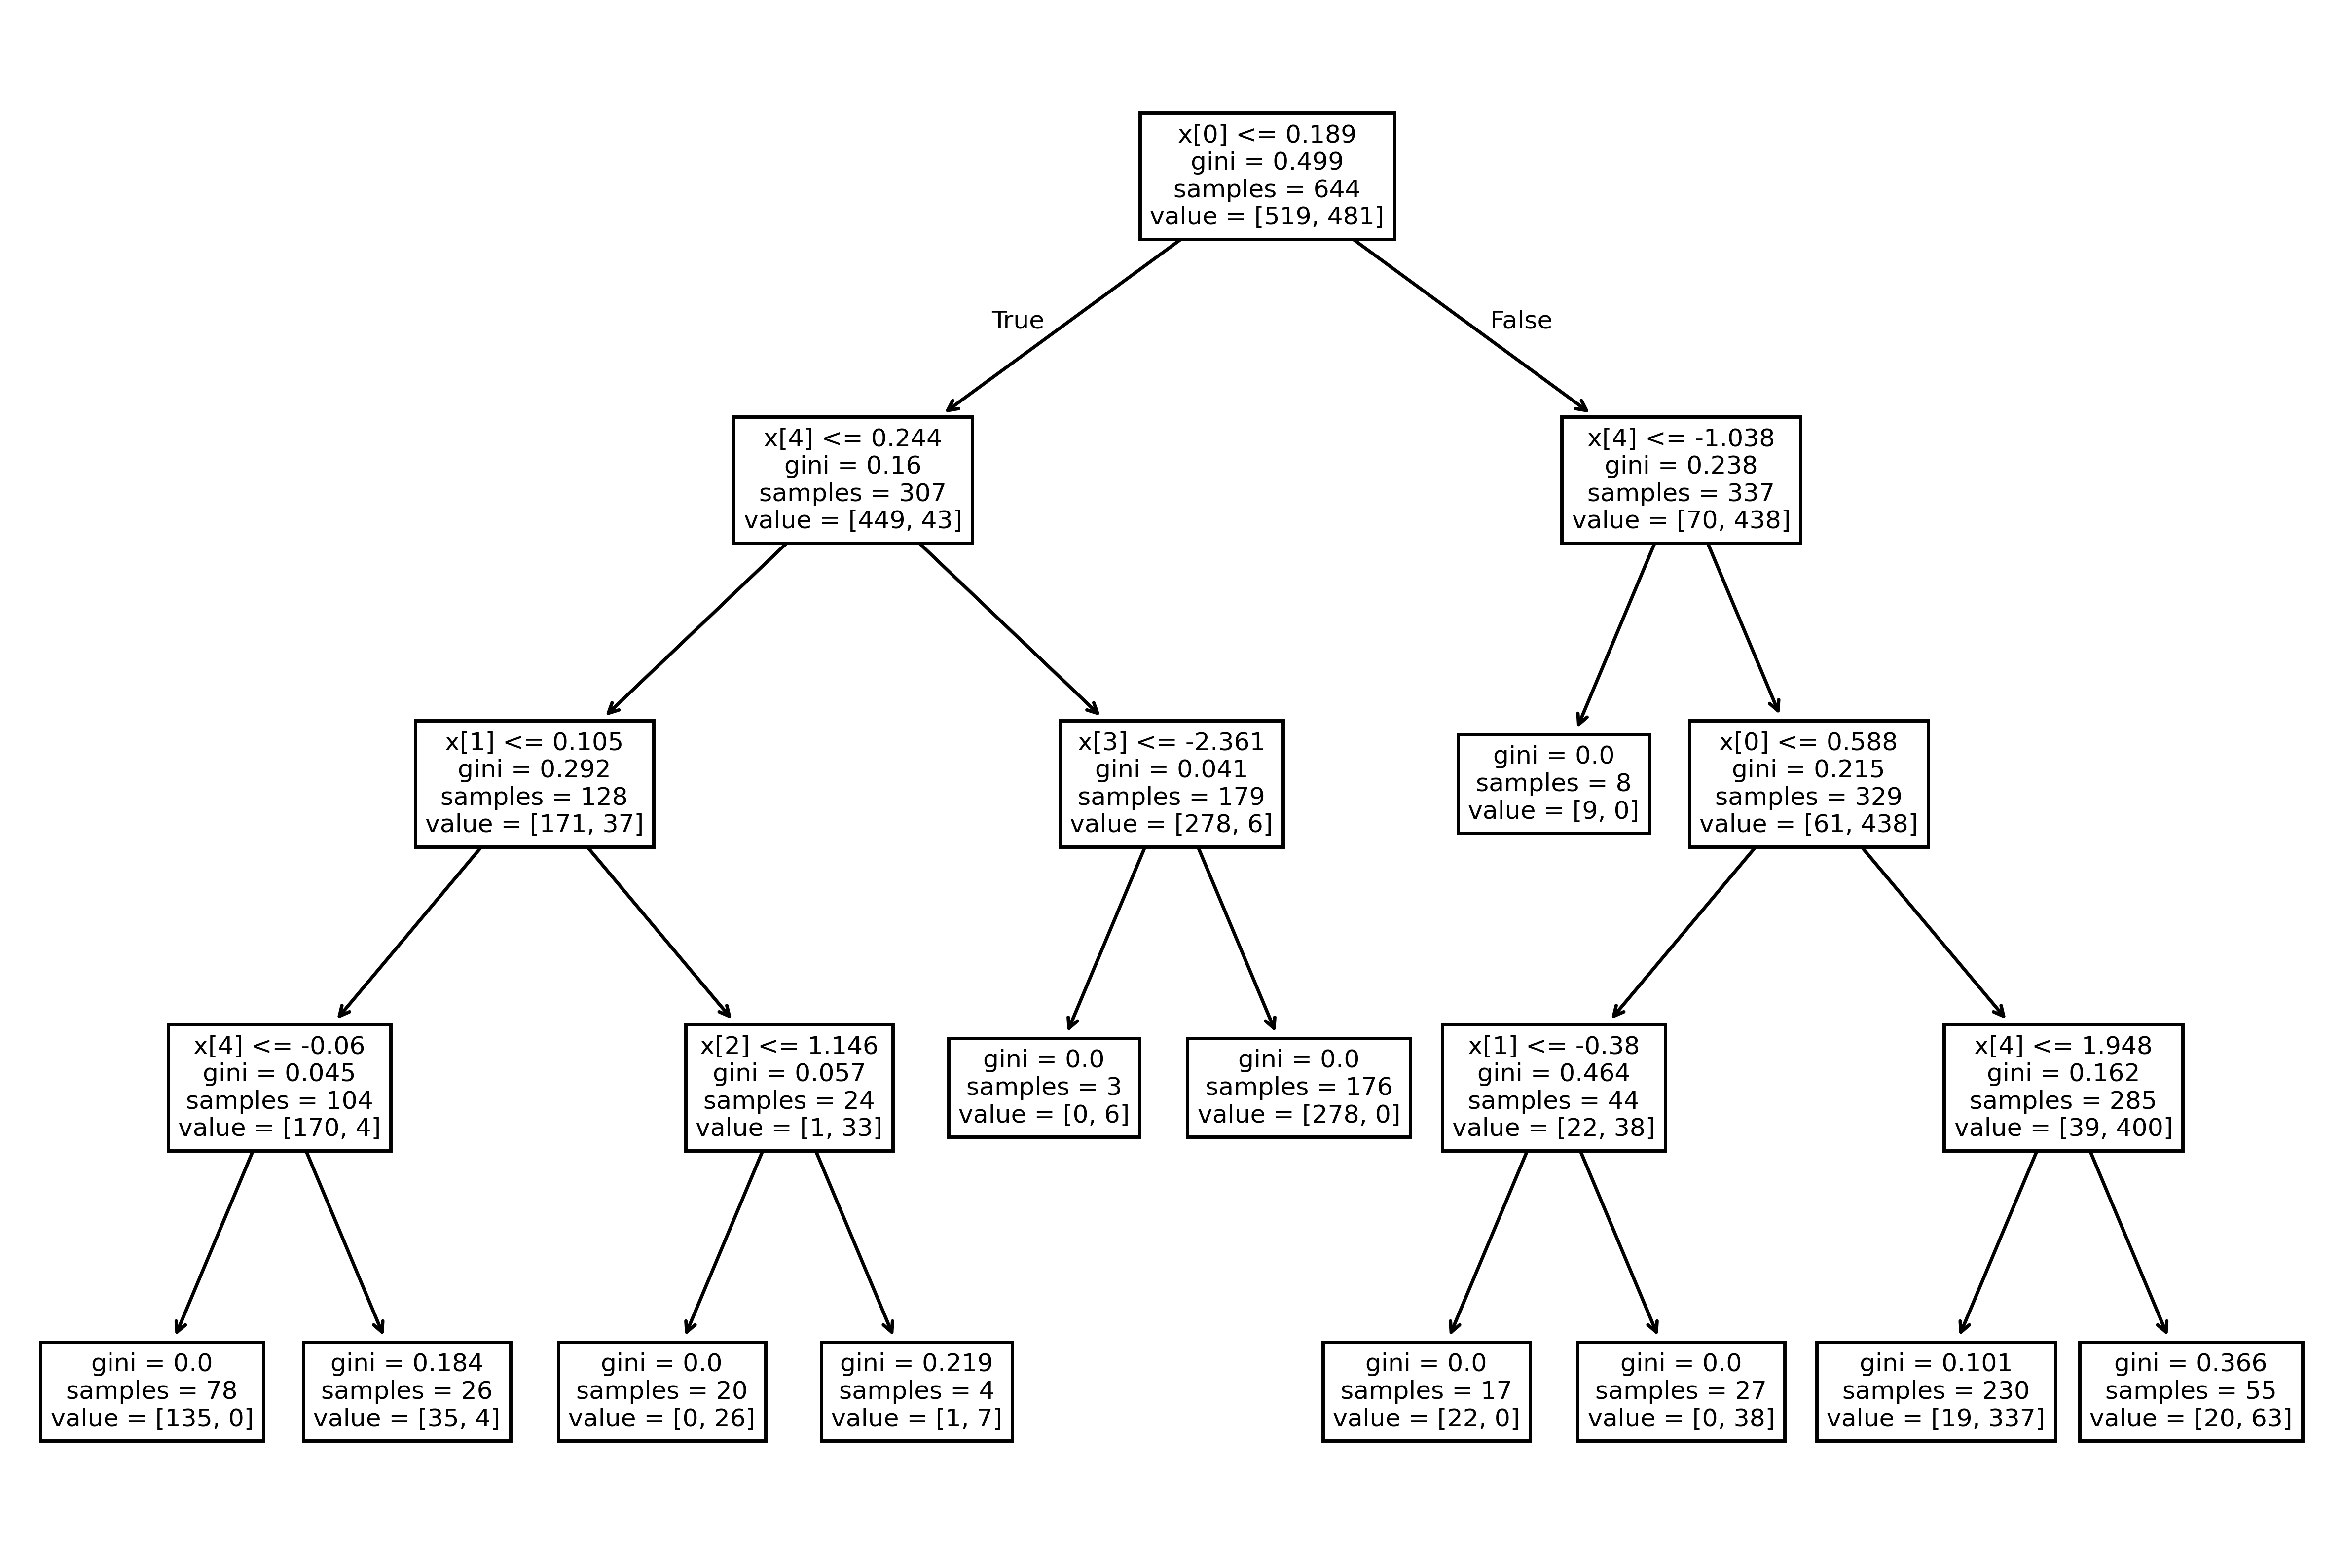

In [60]:
# Visualizing a random tree from the forest:
from sklearn import tree

plt.figure(figsize=(12,8), dpi=500)
tree.plot_tree(rfc.estimators_[45])
plt.show()

---

## Implementing the Random Forest Classification:

- Kaggle Datasets: [Diabetes Data 🔗](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv)

- Also performed the decision tree on the same data so will compare along with implementing.

In [61]:
# Importing 
import numpy as np, pandas as pd
import seaborn as sns, matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
# 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [62]:
data = pd.read_csv('./datasets/diabetes.csv')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [65]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [66]:
fig = go.Figure()
fig.add_trace(go.Pie(labels = ['Safe', 'Diabetic'], 
                     values= data['Outcome'].value_counts(),
                     ))
fig.update_layout(title = "Distribution of Outcomes [Target Classes]")
py.iplot(fig)

In [67]:
# Feature selection and target class define...

X = data.drop('Outcome', axis = 1)
y = data['Outcome']

# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Random Forest Classification:

In [ ]:
rfc = RandomForestClassifier(max_depth=15, n_estimators=250, random_state=42, min_samples_split=8)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_split=8, n_estimators=1000,
                       random_state=42)

In [97]:
y_pred = rfc.predict(X_test)

In [98]:
print(f"ACCURACY: {accuracy_score(y_test, y_pred)}")
print(f"{classification_report(y_test, y_pred)}")

ACCURACY: 0.7489177489177489
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       151
           1       0.64      0.64      0.64        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231



---

By Kirtan Ghelani @SculptSoft